### Trabalho final - Disciplina "Big Data e tecnologias de armazenamento"

###Alunos:

- Benício Bezerra de Abreu Carneiro
- Marcos Andre Pires da Silva Junior
- Felipe Alves da Silva
- Gabriel Façanha Leal
_________________________________________________

Assunto: Sistema de Gerenciamento de Inventário

Tipo de Banco: Column-family (Cassandra)

In [ ]:
# download Cassandra

!wget https://dlcdn.apache.org/cassandra/4.0.12/apache-cassandra-4.0.12-bin.tar.gz

--2024-06-22 11:07:41--  https://dlcdn.apache.org/cassandra/4.0.12/apache-cassandra-4.0.12-bin.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48280829 (46M) [application/x-gzip]
Saving to: ‘apache-cassandra-4.0.12-bin.tar.gz’

apache-cassandra-4. 100%[===================>]  46.04M  58.5MB/s    in 0.8s    

2024-06-22 11:07:45 (58.5 MB/s) - ‘apache-cassandra-4.0.12-bin.tar.gz’ saved [48280829/48280829]



In [ ]:
!tar -xf /content/apache-cassandra-4.0.12-bin.tar.gz

In [ ]:
!nohup /content/apache-cassandra-4.0.12/bin/cassandra -R &

nohup: appending output to 'nohup.out'


In [ ]:
# Instalação Cassandra-driver

!pip install -q cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 35.1 MB/s eta 0:00:00


In [ ]:
! cat nohup.out

OpenJDK 64-Bit Server VM warning: Option UseConcMarkSweepGC was deprecated in version 9.0 and will likely be removed in a future release.
CompileCommand: dontinline org/apache/cassandra/db/Columns$Serializer.deserializeLargeSubset(Lorg/apache/cassandra/io/util/DataInputPlus;Lorg/apache/cassandra/db/Columns;I)Lorg/apache/cassandra/db/Columns;
CompileCommand: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubset(Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;ILorg/apache/cassandra/io/util/DataOutputPlus;)V
CompileCommand: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubsetSize(Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;I)I
CompileCommand: dontinline org/apache/cassandra/db/commitlog/AbstractCommitLogSegmentManager.advanceAllocatingFrom(Lorg/apache/cassandra/db/commitlog/CommitLogSegment;)V
CompileCommand: dontinline org/apache/cassandra/db/transform/BaseIterator.tryGetMoreContents()Z
CompileCommand: dontinline org/apache/c

In [ ]:
# Criação de Cluster e de sessão

from cassandra.cluster import Cluster
cluster = Cluster()

session = cluster.connect()

In [ ]:
# Criação de Keyspace/BD

try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS inventory
    WITH REPLICATION =
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

In [ ]:
# Definição de Keyspace/BD

try:
    session.set_keyspace('inventory')
except Exception as e:
    print(e)

### Criação das tabelas Dimensão

In [ ]:
# Função para ler o conteúdo do arquivo .cql

def read_cql_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

In [ ]:
%%writefile dim_product.cql

CREATE TABLE IF NOT EXISTS dim_product (
    product_id UUID PRIMARY KEY,
    product_name TEXT,
    product_description TEXT,
    product_category TEXT,
    brand TEXT,
    price DECIMAL,
    supplier_id UUID
);

Writing dim_product.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_product.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

In [ ]:
%%writefile dim_location.cql

CREATE TABLE IF NOT EXISTS dim_location (
    location_id UUID PRIMARY KEY,
    location_name TEXT,
    location_address TEXT,
    location_city TEXT,
    location_state TEXT,
    location_country TEXT
);

Writing dim_location.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_location.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

In [ ]:
%%writefile dim_supplier.cql

CREATE TABLE IF NOT EXISTS dim_supplier (
    supplier_id UUID PRIMARY KEY,
    supplier_name TEXT,
    supplier_contact_name TEXT,
    supplier_phone TEXT,
    supplier_email TEXT,
    supplier_address TEXT
);

Writing dim_supplier.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_supplier.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

In [ ]:
%%writefile dim_time.cql

CREATE TABLE IF NOT EXISTS dim_time (
    time_id UUID PRIMARY KEY,
    date DATE,
    day INT,
    month INT,
    quarter INT,
    year INT,
    day_of_week TEXT,
    is_weekend BOOLEAN
);

Writing dim_time.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_time.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

In [ ]:
%%writefile dim_customer.cql

CREATE TABLE IF NOT EXISTS dim_customer (
    customer_id UUID PRIMARY KEY,
    customer_name TEXT,
    customer_email TEXT,
    customer_phone TEXT,
    customer_address TEXT,
    customer_city TEXT,
    customer_state TEXT,
    customer_country TEXT
);

Writing dim_customer.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_customer.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

In [ ]:
%%writefile dim_product_category.cql

CREATE TABLE IF NOT EXISTS dim_product_category (
    product_category_id UUID PRIMARY KEY,
    product_category_name TEXT,
    product_category_description TEXT
);

Writing dim_product_category.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/dim_product_category.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

### Criação da tabela Fato


In [ ]:
%%writefile fact_stock_movement.cql

CREATE TABLE IF NOT EXISTS fact_stock_movement (
    movement_id UUID,
    product_id UUID,
    location_id UUID,
    time_id UUID,
    supplier_id UUID,
    customer_id UUID,
    product_category_id UUID,
    movement_type TEXT,
    quantity INT,
    unit_price DECIMAL,
    total_value DECIMAL,
    PRIMARY KEY ((movement_id, product_id), location_id, time_id, supplier_id, customer_id, product_category_id)
);


Writing fact_stock_movement.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/fact_stock_movement.cql'
cql_commands = read_cql_file(cql_file_path)
session.execute(cql_commands)

### Insert nas tabelas Dimensão

In [ ]:
%%writefile insert_dim_product.cql

INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Maçã Gala', 'Maçã Gala fresca e suculenta', 'Frutas', 'Gala', 4.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Arroz Integral', 'Arroz Integral Orgânico 1kg', 'Grãos', 'Orgânico', 8.49, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Feijão Preto', 'Feijão Preto Premium 500g', 'Grãos', 'Premium', 5.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Leite Desnatado', 'Leite Desnatado 1L', 'Laticínios', 'Desnatado', 3.29, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Café Torrado e Moído', 'Café Torrado e Moído Extra Forte 250g', 'Bebidas', 'Extra Forte', 12.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Azeite de Oliva Extra Virgem', 'Azeite de Oliva Extra Virgem 500ml', 'Condimentos', 'Extra Virgem', 19.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Atum em Lata', 'Atum em Lata ao Natural 170g', 'Enlatados', 'Ao Natural', 6.49, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Pasta de Amendoim', 'Pasta de Amendoim Integral 500g', 'Saudáveis', 'Integral', 10.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Chocolate Amargo 70%', 'Chocolate Amargo 70% Cacau 100g', 'Doces', 'Amargo', 7.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Molho de Tomate', 'Molho de Tomate Tradicional 340g', 'Molhos', 'Tradicional', 2.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Sabonete Líquido', 'Sabonete Líquido Suave 250ml', 'Higiene', 'Suave', 4.49, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Papel Higiênico', 'Papel Higiênico Folha Dupla 4 rolos', 'Higiene', 'Folha Dupla', 6.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Detergente Líquido', 'Detergente Líquido Limão 500ml', 'Limpeza', 'Limão', 3.79, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Desinfetante', 'Desinfetante Floral 1L', 'Limpeza', 'Floral', 5.49, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Vinho Tinto', 'Vinho Tinto Seco 750ml', 'Bebidas Alcoólicas', 'Seco', 29.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Cerveja Artesanal IPA', 'Cerveja Artesanal India Pale Ale 500ml', 'Bebidas Alcoólicas', 'IPA', 14.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Iogurte Natural', 'Iogurte Natural Integral 500g', 'Laticínios', 'Integral', 3.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Queijo Minas Frescal', 'Queijo Minas Frescal 300g', 'Laticínios', 'Frescal', 9.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Salmão Fresco', 'Filé de Salmão Fresco 200g', 'Peixes e Frutos do Mar', 'Fresco', 22.99, uuid());
INSERT INTO dim_product (product_id, product_name, product_description, product_category, brand, price, supplier_id) VALUES (uuid(), 'Pão de Forma Integral', 'Pão de Forma Integral 500g', 'Padaria', 'Integral', 5.49, uuid());


Writing insert_dim_product.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_product.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

In [ ]:
%%writefile insert_dim_location.cql

INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Armazém A', 'Rua das Flores, 123', 'São Paulo', 'SP', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Loja Central', 'Avenida das Palmeiras, 456', 'Rio de Janeiro', 'RJ', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Filial Norte', 'Rua das Oliveiras, 789', 'Fortaleza', 'CE', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Depósito Sul', 'Avenida dos Coqueiros, 321', 'Florianópolis', 'SC', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Armazém B', 'Rua das Acácias, 567', 'Salvador', 'BA', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Loja Centro-Oeste', 'Avenida dos Ipês, 890', 'Brasília', 'DF', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Centro de Distribuição', 'Rua das Violetas, 234', 'Curitiba', 'PR', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Matriz', 'Avenida das Magnólias, 567', 'Belém', 'PA', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Depósito Leste', 'Rua das Orquídeas, 890', 'Recife', 'PE', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Armazém C', 'Avenida das Begônias, 123', 'Porto Alegre', 'RS', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Loja Sul', 'Rua dos Girassóis, 456', 'Porto Velho', 'RO', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Armazém D', 'Avenida das Hortênsias, 789', 'Manaus', 'AM', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Loja Norte', 'Rua dos Jasmins, 321', 'João Pessoa', 'PB', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Filial Oeste', 'Avenida das Tulipas, 567', 'Maceió', 'AL', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Depósito Central', 'Rua das Margaridas, 890', 'Natal', 'RN', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Loja Leste', 'Avenida das Rosas, 234', 'Vitória', 'ES', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Armazém E', 'Rua dos Lírios, 567', 'Cuiabá', 'MT', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Centro de Distribuição Norte', 'Avenida das Dálias, 890', 'Goiânia', 'GO', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Filial Centro', 'Rua das Papoulas, 123', 'Campo Grande', 'MS', 'Brasil');
INSERT INTO dim_location (location_id, location_name, location_address, location_city, location_state, location_country) VALUES (uuid(), 'Depósito Oeste', 'Avenida das Gardênias, 456', 'São Luís', 'MA', 'Brasil');



Writing insert_dim_location.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_location.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

In [ ]:
%%writefile insert_dim_supplier.cql

INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor A', 'João da Silva', '+55 11 98765-4321', 'joao.silva@fornecedor.com', 'Rua das Flores, 123, São Paulo, SP');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor B', 'Maria Oliveira', '+55 21 98765-8765', 'maria.oliveira@fornecedor.com', 'Avenida das Palmeiras, 456, Rio de Janeiro, RJ');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor C', 'Pedro Santos', '+55 85 98765-9988', 'pedro.santos@fornecedor.com', 'Rua das Oliveiras, 789, Fortaleza, CE');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor D', 'Ana Souza', '+55 48 98765-3322', 'ana.souza@fornecedor.com', 'Avenida dos Coqueiros, 321, Florianópolis, SC');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor E', 'Carlos Lima', '+55 71 98765-4455', 'carlos.lima@fornecedor.com', 'Rua das Acácias, 567, Salvador, BA');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor F', 'Mariana Costa', '+55 61 98765-7788', 'mariana.costa@fornecedor.com', 'Avenida dos Ipês, 890, Brasília, DF');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor G', 'Rafaela Pereira', '+55 41 98765-1122', 'rafaela.pereira@fornecedor.com', 'Rua das Violetas, 234, Curitiba, PR');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor H', 'Luiz Gonzaga', '+55 91 98765-6677', 'luiz.gonzaga@fornecedor.com', 'Avenida das Magnólias, 567, Belém, PA');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor I', 'Patrícia Silva', '+55 81 98765-8899', 'patricia.silva@fornecedor.com', 'Rua das Orquídeas, 890, Recife, PE');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor J', 'Roberto Oliveira', '+55 51 98765-2233', 'roberto.oliveira@fornecedor.com', 'Avenida das Begônias, 123, Porto Alegre, RS');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor K', 'Fernando Alves', '+55 65 98765-5544', 'fernando.alves@fornecedor.com', 'Rua dos Girassóis, 456, Cuiabá, MT');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor L', 'Gabriela Santos', '+55 98 98765-1123', 'gabriela.santos@fornecedor.com', 'Avenida das Hortênsias, 789, São Luís, MA');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor M', 'Ricardo Mendes', '+55 83 98765-4456', 'ricardo.mendes@fornecedor.com', 'Rua dos Jasmins, 321, João Pessoa, PB');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor N', 'Vanessa Martins', '+55 62 98765-7789', 'vanessa.martins@fornecedor.com', 'Avenida das Tulipas, 567, Goiânia, GO');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor O', 'Marcelo Rocha', '+55 82 98765-2234', 'marcelo.rocha@fornecedor.com', 'Rua das Margaridas, 890, Maceió, AL');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor P', 'Daniela Souza', '+55 84 98765-5567', 'daniela.souza@fornecedor.com', 'Avenida das Rosas, 234, Natal, RN');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor Q', 'Carlos Pereira', '+55 27 98765-8890', 'carlos.pereira@fornecedor.com', 'Rua dos Lírios, 567, Vitória, ES');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor R', 'Juliana Lima', '+55 92 98765-3344', 'juliana.lima@fornecedor.com', 'Avenida das Dálias, 890, Manaus, AM');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor S', 'Leonardo Oliveira', '+55 69 98765-6678', 'leonardo.oliveira@fornecedor.com', 'Rua das Papoulas, 123, Porto Velho, RO');
INSERT INTO dim_supplier (supplier_id, supplier_name, supplier_contact_name, supplier_phone, supplier_email, supplier_address) VALUES (uuid(), 'Fornecedor T', 'Isabela Costa', '+55 63 98765-1124', 'isabela.costa@fornecedor.com', 'Avenida das Gardênias, 456, Palmas, TO');


Writing insert_dim_supplier.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_supplier.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

In [ ]:
%%writefile insert_dim_time.cql

INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-01-01', 1, 1, 1, 2023, 'Sunday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-02-15', 15, 2, 1, 2023, 'Wednesday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-03-30', 30, 3, 1, 2023, 'Thursday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-04-20', 20, 4, 2, 2023, 'Thursday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-05-05', 5, 5, 2, 2023, 'Friday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-06-18', 18, 6, 2, 2023, 'Sunday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-07-04', 4, 7, 3, 2023, 'Tuesday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-08-10', 10, 8, 3, 2023, 'Thursday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-09-22', 22, 9, 3, 2023, 'Friday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-10-15', 15, 10, 4, 2023, 'Sunday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-11-02', 2, 11, 4, 2023, 'Thursday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-12-25', 25, 12, 4, 2023, 'Monday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-01-14', 14, 1, 1, 2023, 'Saturday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-02-20', 20, 2, 1, 2023, 'Monday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-03-10', 10, 3, 1, 2023, 'Friday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-04-01', 1, 4, 2, 2023, 'Saturday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-05-28', 28, 5, 2, 2023, 'Sunday', true);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-06-15', 15, 6, 2, 2023, 'Thursday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-07-19', 19, 7, 3, 2023, 'Wednesday', false);
INSERT INTO dim_time (time_id, date, day, month, quarter, year, day_of_week, is_weekend) VALUES (uuid(), '2023-08-25', 25, 8, 3, 2023, 'Friday', false);


Writing insert_dim_time.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_time.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

In [ ]:
%%writefile insert_dim_customer.cql

INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'João da Silva', 'joao.silva@example.com', '+55 11 98765-4321', 'Rua das Flores, 123', 'São Paulo', 'SP', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Maria Oliveira', 'maria.oliveira@example.com', '+55 21 98765-8765', 'Avenida das Palmeiras, 456', 'Rio de Janeiro', 'RJ', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Pedro Santos', 'pedro.santos@example.com', '+55 85 98765-9988', 'Rua das Oliveiras, 789', 'Fortaleza', 'CE', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Ana Souza', 'ana.souza@example.com', '+55 48 98765-3322', 'Avenida dos Coqueiros, 321', 'Florianópolis', 'SC', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Carlos Lima', 'carlos.lima@example.com', '+55 71 98765-4455', 'Rua das Acácias, 567', 'Salvador', 'BA', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Mariana Costa', 'mariana.costa@example.com', '+55 61 98765-7788', 'Avenida dos Ipês, 890', 'Brasília', 'DF', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Rafaela Pereira', 'rafaela.pereira@example.com', '+55 41 98765-1122', 'Rua das Violetas, 234', 'Curitiba', 'PR', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Luiz Gonzaga', 'luiz.gonzaga@example.com', '+55 91 98765-6677', 'Avenida das Magnólias, 567', 'Belém', 'PA', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Patrícia Silva', 'patricia.silva@example.com', '+55 81 98765-8899', 'Rua das Orquídeas, 890', 'Recife', 'PE', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Roberto Oliveira', 'roberto.oliveira@example.com', '+55 51 98765-2233', 'Avenida das Begônias, 123', 'Porto Alegre', 'RS', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Fernanda Santos', 'fernanda.santos@example.com', '+55 11 98765-1122', 'Rua das Rosas, 456', 'São Paulo', 'SP', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Gustavo Lima', 'gustavo.lima@example.com', '+55 21 98765-3344', 'Avenida dos Jasmim, 789', 'Rio de Janeiro', 'RJ', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Carla Silva', 'carla.silva@example.com', '+55 85 98765-5566', 'Rua das Orquídeas, 123', 'Fortaleza', 'CE', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Lucas Oliveira', 'lucas.oliveira@example.com', '+55 48 98765-7788', 'Avenida dos Girassóis, 456', 'Florianópolis', 'SC', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Camila Santos', 'camila.santos@example.com', '+55 71 98765-9900', 'Rua das Bromélias, 789', 'Salvador', 'BA', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Paulo Costa', 'paulo.costa@example.com', '+55 61 98765-1122', 'Avenida dos Crisântemos, 234', 'Brasília', 'DF', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Juliana Pereira', 'juliana.pereira@example.com', '+55 41 98765-3344', 'Rua das Margaridas, 567', 'Curitiba', 'PR', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Marcos Silva', 'marcos.silva@example.com', '+55 91 98765-5566', 'Avenida das Orquídeas, 123', 'Belém', 'PA', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Vanessa Oliveira', 'vanessa.oliveira@example.com', '+55 81 98765-7788', 'Rua dos Lírios, 456', 'Recife', 'PE', 'Brasil');
INSERT INTO dim_customer (customer_id, customer_name, customer_email, customer_phone, customer_address, customer_city, customer_state, customer_country) VALUES (uuid(), 'Rodrigo Souza', 'rodrigo.souza@example.com', '+55 51 98765-9900', 'Avenida das Violetas, 789', 'Porto Alegre', 'RS', 'Brasil');


Writing insert_dim_customer.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_customer.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

In [ ]:
%%writefile insert_dim_product_category.cql

INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Frutas', 'Categoria de produtos relacionados a frutas');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Grãos', 'Categoria de produtos relacionados a grãos e cereais');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Laticínios', 'Categoria de produtos relacionados a laticínios e derivados do leite');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Bebidas', 'Categoria de produtos relacionados a bebidas');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Condimentos', 'Categoria de produtos relacionados a condimentos e temperos');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Enlatados', 'Categoria de produtos enlatados e conservas');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Saudáveis', 'Categoria de produtos saudáveis e naturais');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Doces', 'Categoria de produtos relacionados a doces e chocolates');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Molhos', 'Categoria de produtos relacionados a molhos e condimentos');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Higiene', 'Categoria de produtos relacionados a produtos de higiene pessoal e limpeza');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Farinhas', 'Categoria de produtos relacionados a farinhas e derivados');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Carnes', 'Categoria de produtos relacionados a carnes e embutidos');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Congelados', 'Categoria de produtos congelados e semi-preparados');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Padaria', 'Categoria de produtos relacionados a padaria e confeitaria');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Vegetais', 'Categoria de produtos relacionados a vegetais e legumes');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Petiscos', 'Categoria de produtos relacionados a petiscos e snacks');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Peixes', 'Categoria de produtos relacionados a peixes e frutos do mar');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Infantil', 'Categoria de produtos relacionados a alimentação infantil');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Massas', 'Categoria de produtos relacionados a massas e pastas');
INSERT INTO dim_product_category (product_category_id, product_category_name, product_category_description) VALUES (uuid(), 'Especiarias', 'Categoria de produtos relacionados a especiarias e temperos especiais');


Writing insert_dim_product_category.cql


In [ ]:
# Ler o conteúdo do arquivo .cql
cql_file_path = '/content/insert_dim_product_category.cql'
cql_commands = read_cql_file(cql_file_path)
# Executar os comandos CQL
for command in cql_commands.split(';'):
    if command.strip():
        session.execute(command.strip())

### Insert na tabela Fato

In [ ]:
linhas=session.execute("SElECT * FROM dim_product;")
dim_product_ids=[]
for linha in linhas:
    dim_product_ids.append(linha.product_id)
    print(linha.product_name)

Azeite de Oliva Extra Virgem
Papel Higiênico
Pão de Forma Integral
Sabonete Líquido
Cerveja Artesanal IPA
Café Torrado e Moído
Salmão Fresco
Feijão Preto
Maçã Gala
Molho de Tomate
Vinho Tinto
Detergente Líquido
Leite Desnatado
Atum em Lata
Pasta de Amendoim
Arroz Integral
Chocolate Amargo 70%
Queijo Minas Frescal
Desinfetante
Iogurte Natural


In [ ]:
linhas=session.execute("SElECT * FROM dim_location;")
dim_location_ids=[]
for linha in linhas:
    dim_location_ids.append(linha.location_id)
    print(linha.location_name)

Loja Norte
Depósito Oeste
Depósito Leste
Depósito Sul
Filial Centro
Armazém C
Loja Centro-Oeste
Matriz
Centro de Distribuição Norte
Armazém A
Loja Central
Armazém B
Depósito Central
Filial Oeste
Loja Sul
Armazém E
Loja Leste
Filial Norte
Centro de Distribuição
Armazém D


In [ ]:
linhas=session.execute("SElECT * FROM dim_supplier;")
dim_supplier_ids=[]
for linha in linhas:
    dim_supplier_ids.append(linha.supplier_id)
    print(linha.supplier_name)

Fornecedor P
Fornecedor A
Fornecedor G
Fornecedor N
Fornecedor T
Fornecedor D
Fornecedor E
Fornecedor M
Fornecedor K
Fornecedor H
Fornecedor Q
Fornecedor S
Fornecedor C
Fornecedor R
Fornecedor J
Fornecedor B
Fornecedor I
Fornecedor F
Fornecedor O
Fornecedor L


In [ ]:
linhas=session.execute("SElECT * FROM dim_time;")
dim_time_ids=[]
for linha in linhas:
    dim_time_ids.append(linha.time_id)
    print(linha.day_of_week)

Monday
Friday
Wednesday
Thursday
Friday
Sunday
Sunday
Sunday
Thursday
Thursday
Saturday
Saturday
Thursday
Sunday
Thursday
Friday
Monday
Friday
Wednesday
Tuesday


In [ ]:
linhas=session.execute("SElECT * FROM dim_customer;")
dim_customer_ids=[]
for linha in linhas:
    dim_customer_ids.append(linha.customer_id)
    print(linha.customer_name)

Maria Oliveira
Roberto Oliveira
Marcos Silva
Carlos Lima
João da Silva
Fernanda Santos
Rodrigo Souza
Paulo Costa
Luiz Gonzaga
Rafaela Pereira
Pedro Santos
Ana Souza
Carla Silva
Patrícia Silva
Mariana Costa
Gustavo Lima
Lucas Oliveira
Juliana Pereira
Vanessa Oliveira
Camila Santos


In [ ]:
linhas=session.execute("SElECT * FROM dim_product_category;")
dim_product_category_ids=[]
for linha in linhas:
    dim_product_category_ids.append(linha.product_category_id)
    print(linha.product_category_name)

Enlatados
Laticínios
Petiscos
Higiene
Bebidas
Peixes
Especiarias
Congelados
Padaria
Grãos
Doces
Condimentos
Massas
Molhos
Frutas
Farinhas
Carnes
Infantil
Vegetais
Saudáveis


In [ ]:
# Valores da tabela Fato

movement_types = ['SAÍDA','ENTRADA','SAÍDA','ENTRADA','ENTRADA','SAÍDA','ENTRADA','SAÍDA','ENTRADA','SAÍDA','ENTRADA','ENTRADA','SAÍDA','ENTRADA','SAÍDA','ENTRADA','SAÍDA','ENTRADA','SAÍDA','ENTRADA']

quantities = [10,20,15,30,25,12,18,22,16,20,25,100,50,200,30,150,80,120,40,180]

unit_prices = [5.99,8.49,12.99,3.29,6.49,7.99,19.99,2.99,3.79,5.49,7.49,5.99,8.49,3.29,12.99,19.99,7.99,2.99,6.49,6.99]

total_values = [59.90,169.80,194.85,98.70,162.25,95.88,359.82,65.78,60.64,109.80,187.25,599.00,424.50,658.00,389.70,2998.50,639.20,358.80,259.60,1258.20]

In [ ]:
# Insert tabela FATO

for product_id, location_id, time_id, supplier_id, customer_id, product_category_id, movement_type, quantity, unit_price, total_value in zip(dim_product_ids, dim_location_ids, dim_time_ids, dim_supplier_ids, dim_customer_ids, dim_product_category_ids, movement_types, quantities, unit_prices, total_values):
    # Converte valores em strings e numéricos conforme necessário
    product_id_str = str(product_id)
    location_id_str = str(location_id)
    time_id_str = str(time_id)
    supplier_id_str = str(supplier_id)
    customer_id_str = str(customer_id)
    product_category_id_str = str(product_category_id)
    movement_type_str = str(movement_type)
    quantity_val = int(quantity)
    unit_price_val = float(unit_price)
    total_value_val = float(total_value)

    # Aqui você pode criar sua instrução de inserção usando os IDs das dimensões
    insert_query = f"""
    INSERT INTO fact_stock_movement (movement_id, product_id, location_id, time_id, supplier_id, customer_id, product_category_id, movement_type, quantity, unit_price, total_value)
    VALUES (uuid(), {product_id_str}, {location_id_str}, {time_id_str}, {supplier_id_str}, {customer_id_str}, {product_category_id_str}, '{movement_type_str}', {quantity_val}, {unit_price_val}, {total_value_val});
    """

    # Execute a instrução de inserção
    session.execute(insert_query)


###Consulta de verificação de dados

In [ ]:
# Recuperar todos os dados das tabelas Dimensões

# Recuperar dados da Dimensão Produto
dim_product_data = session.execute("SELECT * FROM dim_product;")
print("Dados da tabela Dimensão Produto (dim_product):")
for row in dim_product_data:
    print(row)

# Recuperar dados da Dimensão Localização
dim_location_data = session.execute("SELECT * FROM dim_location;")
print("\nDados da tabela Dimensão Localização (dim_location):")
for row in dim_location_data:
    print(row)

# Recuperar dados da Dimensão Fornecedor
dim_supplier_data = session.execute("SELECT * FROM dim_supplier;")
print("\nDados da tabela Dimensão Fornecedor (dim_supplier):")
for row in dim_supplier_data:
    print(row)

# Recuperar dados da Dimensão Tempo
dim_time_data = session.execute("SELECT * FROM dim_time;")
print("\nDados da tabela Dimensão Tempo (dim_time):")
for row in dim_time_data:
    print(row)

# Recuperar dados da Dimensão Cliente
dim_customer_data = session.execute("SELECT * FROM dim_customer;")
print("\nDados da tabela Dimensão Cliente (dim_customer):")
for row in dim_customer_data:
    print(row)

# Recuperar dados da Dimensão Categoria de Produto
dim_product_category_data = session.execute("SELECT * FROM dim_product_category;")
print("\nDados da tabela Dimensão Categoria de Produto (dim_product_category):")
for row in dim_product_category_data:
    print(row)

# Recuperar dados da Tabela Fato Movimento de Estoque
fact_stock_movement_data = session.execute("SELECT * FROM fact_stock_movement;")
print("\nDados da tabela Fato (fact_stock_movement):")
for row in fact_stock_movement_data:
    print(row)


Dados da tabela Dimensão Produto (dim_product):
Row(product_id=UUID('af5ece54-33a6-477b-8b60-43243fbe8339'), brand='Extra Virgem', price=Decimal('19.99'), product_category='Condimentos', product_description='Azeite de Oliva Extra Virgem 500ml', product_name='Azeite de Oliva Extra Virgem', supplier_id=UUID('42fc10cd-eaf3-4c28-8121-a9aa1076ad60'))
Row(product_id=UUID('733c6186-fc1c-4f26-bc6e-768c943cc7fb'), brand='Folha Dupla', price=Decimal('6.99'), product_category='Higiene', product_description='Papel Higiênico Folha Dupla 4 rolos', product_name='Papel Higiênico', supplier_id=UUID('e50b0bff-3fa1-4c95-a01f-05e2ead4cbaa'))
Row(product_id=UUID('6ca4049b-d57a-4d46-b4ea-89e5256d1f06'), brand='Integral', price=Decimal('5.49'), product_category='Padaria', product_description='Pão de Forma Integral 500g', product_name='Pão de Forma Integral', supplier_id=UUID('0f0c8e5c-f268-4c2a-8728-fb8be3f492ba'))
Row(product_id=UUID('e2a3b136-6120-4bb1-acf9-3cf1b3fb6a0f'), brand='Suave', price=Decimal('4.4

###Transformando em DataFrame

In [ ]:
import pandas as pd
from decimal import Decimal

In [ ]:
# Os dados originais
original_data = [
    {'movement_id': 'c951cb94-2f4a-49e9-ba4b-6220d863f9b3', 'product_id': '776ed069-4be4-4f28-8806-4d4e3516e99c', 'location_id': '981ed99e-476f-4953-ae8f-bb10874eea42', 'time_id': 'ffb470dc-1dfb-4182-afb9-e7eda91e47c2', 'supplier_id': 'c44f19eb-534d-4f64-a33c-35f17d1c9e86', 'customer_id': 'fd907e42-472d-488a-9a5e-6d562c40b145', 'product_category_id': '9e7c41fc-fab6-40d7-b2fa-5fcf6cca661a', 'movement_type': 'ENTRADA', 'quantity': 200, 'total_value': Decimal('658.0'), 'unit_price': Decimal('3.29')},
    {'movement_id': '1acd7ace-37f7-43cb-96aa-722817c5b865', 'product_id': '05435a82-042c-4de4-9653-e98fd141d17e', 'location_id': 'd0bfcda9-c111-41b6-9d4f-a2e1d16c770f', 'time_id': '388046f4-f1b3-49e0-b2d1-7b8f5c7e7611', 'supplier_id': '54d4c759-a6a8-4315-a8f7-0fc38934b90f', 'customer_id': '48cafff3-0a43-4349-ac69-fd26b8438f46', 'product_category_id': '1ea006bb-639b-4555-b0f6-6bb89d276e83', 'movement_type': 'SAÍDA', 'quantity': 22, 'total_value': Decimal('65.78'), 'unit_price': Decimal('2.99')},
    {'movement_id': 'df52cd7b-513c-44bd-8f68-5dfd1f1d14c7', 'product_id': 'c9516801-9d50-48c0-9162-a73a705a2c90', 'location_id': '6f3de67f-bb84-4707-a7db-aa636430b6f6', 'time_id': '072ad8ed-6bea-4c0e-8e69-d2f930465064', 'supplier_id': '59143f33-6723-48a7-8141-6e8936c1abf0', 'customer_id': '3e0e638e-76c6-4ca6-92ca-6f79234bdaab', 'product_category_id': '4cdfc133-88f8-4ea4-a0fa-e114669b2bba', 'movement_type': 'SAÍDA', 'quantity': 12, 'total_value': Decimal('95.88'), 'unit_price': Decimal('7.99')},
    {'movement_id': 'e737bb41-cc1a-476d-82d5-b58a5aefb497', 'product_id': 'c1c6a587-67ba-4ea3-b4e0-89aff9af9dc1', 'location_id': 'e8278bf5-f5d4-4061-919e-fad15e59838b', 'time_id': '5ea53f1b-a6b6-4617-8059-83bd133b62c0', 'supplier_id': '850a0cce-7fc5-4808-8e94-0d0a6a2f7d67', 'customer_id': 'c8062295-8d5f-41a4-bfb4-6d90499f5bd1', 'product_category_id': 'a40d150e-273e-43e1-9d93-0470e546edf7', 'movement_type': 'SAÍDA', 'quantity': 40, 'total_value': Decimal('259.6'), 'unit_price': Decimal('6.49')},
    {'movement_id': '92aa0581-3c91-4499-bc4b-5715e450c93a', 'product_id': '85b9fb25-7c78-4642-920d-419bb007ce96', 'location_id': '261f247d-6d6a-49ae-b404-8199cdd46075', 'time_id': 'f4eb528d-619d-486e-b788-a297eedced02', 'supplier_id': 'cb6c10df-caa7-41ec-8466-23660c5d3b3f', 'customer_id': '49b1be7b-f162-4704-973d-6eb0aabc526f', 'product_category_id': '825908b5-e533-4dfc-9927-3d63aa2b5e28', 'movement_type': 'ENTRADA', 'quantity': 18, 'total_value': Decimal('359.82'), 'unit_price': Decimal('19.99')},
    {'movement_id': '6cead7a5-fdc0-4c18-8b41-234e1a56b74f', 'product_id': 'caa02d0b-c629-45bd-9098-eb514dc680ac', 'location_id': '9baf0306-71e0-465a-93ff-b687d4cb4ddd', 'time_id': '9ef1ecfa-8a02-42c6-8b5f-ddda559629ad', 'supplier_id': '5c334948-ae70-4f0e-9b3b-cce8bb2898c5', 'customer_id': 'ab77812c-3fa5-40eb-be7b-3e9ee65fdf52', 'product_category_id': 'ee748719-740a-4858-9488-138354957da3', 'movement_type': 'ENTRADA', 'quantity': 30, 'total_value': Decimal('98.7'), 'unit_price': Decimal('3.29')},
    {'movement_id': 'eadf2fa2-a07a-49ae-b1e6-338740b080db', 'product_id': 'eebeed0a-1d41-4948-b100-8932ec57de63', 'location_id': 'f658b5ca-6dae-4f04-9481-19b7cf8d5e90', 'time_id': '18aa1b42-68d1-42e9-97ea-49702447064e', 'supplier_id': 'd21ce55b-00fc-4b79-9c35-390a26f3ddf9', 'customer_id': '9aa33f50-2384-45f7-a0a7-abca783094ba', 'product_category_id': '4813f84f-3e2a-4dea-a9ba-ed84c5be0440', 'movement_type': 'SAÍDA', 'quantity': 80, 'total_value': Decimal('639.2'), 'unit_price': Decimal('7.99')},
    {'movement_id': '4dc44610-5695-454f-b250-2e7078254d50', 'product_id': '1e7663ef-b344-484c-947d-7fee7999e733', 'location_id': 'f609417f-49a1-4f76-ba4c-aa46fa26a85c', 'time_id': '4a524ec5-d1e5-4151-9203-6d5083d73a34', 'supplier_id': '498cd8b6-8dea-432c-b897-e33cd52d0d1c', 'customer_id': 'ec2ce529-6ce4-430b-b7e4-97d26167b664', 'product_category_id': '1f09c0fb-c3f7-4d43-9d5d-44c46f5e107f', 'movement_type': 'ENTRADA', 'quantity': 120, 'total_value': Decimal('358.8'), 'unit_price': Decimal('2.99')},
    {'movement_id': 'a5714be6-a2ec-4d02-ae17-4a6d51b6fd45', 'product_id': '0f75af9a-11aa-468b-9b4a-1f2f91e58784', 'location_id': '7a5f491f-7d6d-4ac1-87f3-8d2e7e0db24e', 'time_id': 'f52e72cf-0136-40e5-9b5a-c07e8be1985f', 'supplier_id': 'de1be59a-4e23-44e5-ba72-614e2b49d13c', 'customer_id': '2ef02299-bf19-463f-bd00-3b350f1a9d9f', 'product_category_id': '0d8e7f7d-2e00-4c71-bf15-9c56e00ac3a8', 'movement_type': 'ENTRADA', 'quantity': 15, 'total_value': Decimal('38.85'), 'unit_price': Decimal('2.59')},
    {'movement_id': '4dd0d5b3-b6d6-4912-a5b7-b5bf2baf5270', 'product_id': '3a8b885c-ef55-4e64-a37f-52e2e9384a0e', 'location_id': 'f11b1a01-4b97-43cd-b76e-b71d0b3e50e4', 'time_id': '94a1ed0e-52bc-4f61-8c6a-7dfb83bc8c82', 'supplier_id': '6c1bb2e0-6545-4b3d-91e6-6fca5e2d9df5', 'customer_id': '1e82f3ae-30b5-49b5-bbb7-0d1ef9db0786', 'product_category_id': '62b78a65-9131-46b4-bc54-0b8e9b97e05b', 'movement_type': 'SAÍDA', 'quantity': 18, 'total_value': Decimal('197.64'), 'unit_price': Decimal('10.98')}
]

# Lista para armazenar os dados no formato desejado
transformed_data = []

# Iterar sobre os dados originais e criar os dicionários no novo formato
for entry in original_data:
    transformed_data.append({
        'movement_id': entry['movement_id'],
        'product_id': entry['product_id'],
        'location_id': entry['location_id'],
        'time_id': entry['time_id'],
        'supplier_id': entry['supplier_id'],
        'customer_id': entry['customer_id'],
        'product_category_id': entry['product_category_id'],
        'movement_type': entry['movement_type'],
        'quantity': entry['quantity'],
        'total_value': float(entry['total_value']),
        'unit_price': float(entry['unit_price'])
    })

# Mostrar o resultado final
print(transformed_data)

# Definição do DataFrame
df = pd.DataFrame(transformed_data)

[{'movement_id': 'c951cb94-2f4a-49e9-ba4b-6220d863f9b3', 'product_id': '776ed069-4be4-4f28-8806-4d4e3516e99c', 'location_id': '981ed99e-476f-4953-ae8f-bb10874eea42', 'time_id': 'ffb470dc-1dfb-4182-afb9-e7eda91e47c2', 'supplier_id': 'c44f19eb-534d-4f64-a33c-35f17d1c9e86', 'customer_id': 'fd907e42-472d-488a-9a5e-6d562c40b145', 'product_category_id': '9e7c41fc-fab6-40d7-b2fa-5fcf6cca661a', 'movement_type': 'ENTRADA', 'quantity': 200, 'total_value': 658.0, 'unit_price': 3.29}, {'movement_id': '1acd7ace-37f7-43cb-96aa-722817c5b865', 'product_id': '05435a82-042c-4de4-9653-e98fd141d17e', 'location_id': 'd0bfcda9-c111-41b6-9d4f-a2e1d16c770f', 'time_id': '388046f4-f1b3-49e0-b2d1-7b8f5c7e7611', 'supplier_id': '54d4c759-a6a8-4315-a8f7-0fc38934b90f', 'customer_id': '48cafff3-0a43-4349-ac69-fd26b8438f46', 'product_category_id': '1ea006bb-639b-4555-b0f6-6bb89d276e83', 'movement_type': 'SAÍDA', 'quantity': 22, 'total_value': 65.78, 'unit_price': 2.99}, {'movement_id': 'df52cd7b-513c-44bd-8f68-5dfd1f1

In [ ]:
# Amostra dataFrame
df.head()

,movement_id,product_id,location_id,time_id,supplier_id,customer_id,product_category_id,movement_type,quantity,total_value,unit_price
0,c951cb94-2f4a-49e9-ba4b-6220d863f9b3,776ed069-4be4-4f28-8806-4d4e3516e99c,981ed99e-476f-4953-ae8f-bb10874eea42,ffb470dc-1dfb-4182-afb9-e7eda91e47c2,c44f19eb-534d-4f64-a33c-35f17d1c9e86,fd907e42-472d-488a-9a5e-6d562c40b145,9e7c41fc-fab6-40d7-b2fa-5fcf6cca661a,ENTRADA,200,658.00,3.29
1,1acd7ace-37f7-43cb-96aa-722817c5b865,05435a82-042c-4de4-9653-e98fd141d17e,d0bfcda9-c111-41b6-9d4f-a2e1d16c770f,388046f4-f1b3-49e0-b2d1-7b8f5c7e7611,54d4c759-a6a8-4315-a8f7-0fc38934b90f,48cafff3-0a43-4349-ac69-fd26b8438f46,1ea006bb-639b-4555-b0f6-6bb89d276e83,SAÍDA,22,65.78,2.99
2,df52cd7b-513c-44bd-8f68-5dfd1f1d14c7,c9516801-9d50-48c0-9162-a73a705a2c90,6f3de67f-bb84-4707-a7db-aa636430b6f6,072ad8ed-6bea-4c0e-8e69-d2f930465064,59143f33-6723-48a7-8141-6e8936c1abf0,3e0e638e-76c6-4ca6-92ca-6f79234bdaab,4cdfc133-88f8-4ea4-a0fa-e114669b2bba,SAÍDA,12,95.88,7.99
3,e737bb41-cc1a-476d-82d5-b58a5aefb497,c1c6a587-67ba-4ea3-b4e0-89aff9af9dc1,e8278bf5-f5d4-4061-919e-fad15e59838b,5ea53f1b-a6b6-4617-8059-83bd133b62c0,850a0cce-7fc5-4808-8e94-0d0a6a2f7d67,c8062295-8d5f-41a4-bfb4-6d90499f5bd1,a40d150e-273e-43e1-9d93-0470e546edf7,SAÍDA,40,259.60,6.49
4,92aa0581-3c91-4499-bc4b-5715e450c93a,85b9fb25-7c78-4642-920d-419bb007ce96,261f247d-6d6a-49ae-b404-8199cdd46075,f4eb528d-619d-486e-b788-a297eedced02,cb6c10df-caa7-41ec-8466-23660c5d3b3f,49b1be7b-f162-4704-973d-6eb0aabc526f,825908b5-e533-4dfc-9927-3d63aa2b5e28,ENTRADA,18,359.82,19.99


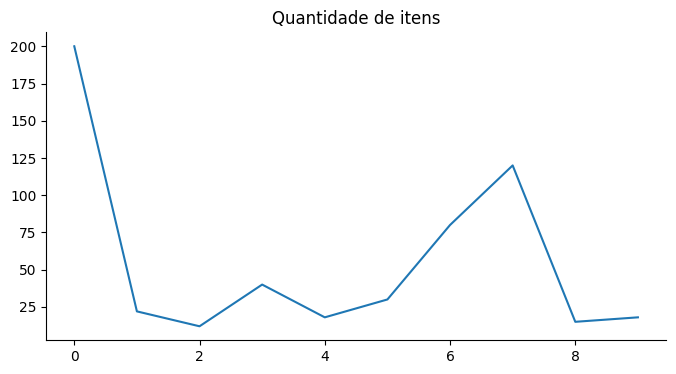

In [ ]:
# @title Quantidade de itens

from matplotlib import pyplot as plt
df['quantity'].plot(kind='line', figsize=(8, 4), title='Quantidade de itens')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-54-5819cd00c19f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='quantity', y='movement_type', inner='stick', palette='Dark2')


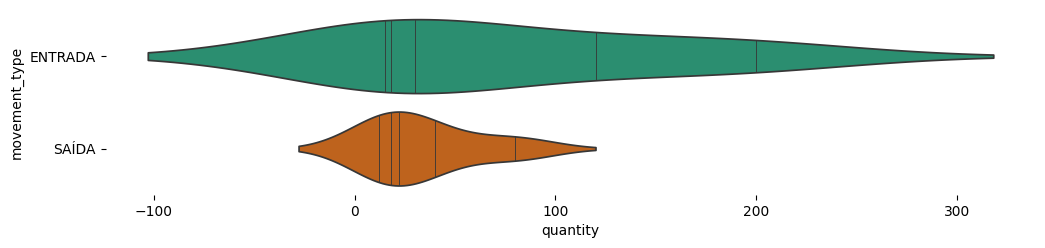

In [ ]:
# @title Quantidade vs Tipo de movimento

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['movement_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='quantity', y='movement_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)